In [152]:
import pandas as pd
import numpy as np
import os
import yfinance as yf
import itertools
import warnings
import functions as func
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import shapiro

In [74]:
DATA_PATH = "nvda_data.json"

if os.path.exists(DATA_PATH):
    
    with open(DATA_PATH) as f:
        nvda_hist = pd.read_json(DATA_PATH)
else:
    nvda = yf.Ticker("NVDA")
    nvda_hist = nvda.history(period="max")

    nvda_hist.to_json(DATA_PATH)

In [75]:
nvda_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1999-01-22 05:00:00,0.401320,0.447901,0.355933,0.376237,271468800,0.0,0.0
1999-01-25 05:00:00,0.406097,0.420430,0.376237,0.415653,51048000,0.0,0.0
1999-01-26 05:00:00,0.420430,0.428791,0.377431,0.383404,34320000,0.0,0.0
1999-01-27 05:00:00,0.384598,0.394154,0.363098,0.382210,24436800,0.0,0.0
1999-01-28 05:00:00,0.382210,0.384598,0.378626,0.381015,22752000,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-03 04:00:00,884.840027,903.739990,884.000000,889.640015,37006700,0.0,0.0
2024-04-04 04:00:00,904.059998,906.340027,858.799988,859.049988,43496500,0.0,0.0
2024-04-05 04:00:00,868.659973,884.809998,859.260010,880.080017,39885700,0.0,0.0
2024-04-08 04:00:00,887.000000,888.299988,867.320007,871.330017,28322000,0.0,0.0


<Axes: >

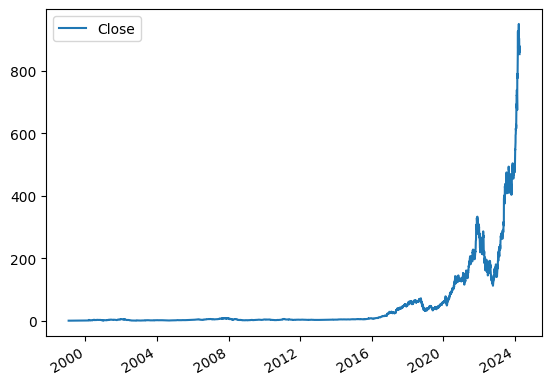

In [76]:
nvda_hist.plot.line(y="Close", use_index=True)

In [77]:
data_nvda = nvda_hist[['Close']]
data_nvda.head()

,Close
1999-01-22 05:00:00,0.376237
1999-01-25 05:00:00,0.415653
1999-01-26 05:00:00,0.383404
1999-01-27 05:00:00,0.382210
1999-01-28 05:00:00,0.381015


In [78]:
df_nvda = func.calculate_technical_indicators(nvda_hist)

In [79]:
df_nvda

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ema_12,ema_26,macd_line,macd_signal,rsi
1999-01-22 05:00:00,0.401320,0.447901,0.355933,0.376237,271468800,0.0,0.0,0.376237,0.376237,0.000000,0.000000,NaN
1999-01-25 05:00:00,0.406097,0.420430,0.376237,0.415653,51048000,0.0,0.0,0.382301,0.379157,0.003144,0.000629,NaN
1999-01-26 05:00:00,0.420430,0.428791,0.377431,0.383404,34320000,0.0,0.0,0.382471,0.379471,0.002999,0.001103,NaN
1999-01-27 05:00:00,0.384598,0.394154,0.363098,0.382210,24436800,0.0,0.0,0.382430,0.379674,0.002756,0.001434,NaN
1999-01-28 05:00:00,0.382210,0.384598,0.378626,0.381015,22752000,0.0,0.0,0.382213,0.379774,0.002439,0.001635,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-03 04:00:00,884.840027,903.739990,884.000000,889.640015,37006700,0.0,0.0,900.472060,867.487024,32.985035,43.675697,44.162626
2024-04-04 04:00:00,904.059998,906.340027,858.799988,859.049988,43496500,0.0,0.0,894.099433,866.862058,27.237375,40.388032,43.856582
2024-04-05 04:00:00,868.659973,884.809998,859.260010,880.080017,39885700,0.0,0.0,891.942600,867.841166,24.101433,37.130712,50.459906
2024-04-08 04:00:00,887.000000,888.299988,867.320007,871.330017,28322000,0.0,0.0,888.771433,868.099600,20.671833,33.838937,46.493006


In [80]:
df_nvda_clean = df_nvda.dropna(subset=['rsi'])
df_nvda_clean.index = pd.to_datetime(df_nvda_clean.index)
df_nvda_clean

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ema_12,ema_26,macd_line,macd_signal,rsi
1999-02-10 05:00:00,0.351155,0.360710,0.341600,0.347571,14822400,0.0,0.0,0.363664,0.369379,-0.005715,-0.003187,42.682905
1999-02-11 05:00:00,0.348766,0.391764,0.348766,0.377431,13224000,0.0,0.0,0.365782,0.369976,-0.004194,-0.003388,50.264534
1999-02-12 05:00:00,0.382210,0.401320,0.382210,0.398931,10972800,0.0,0.0,0.370882,0.372121,-0.001239,-0.002958,45.977053
1999-02-16 05:00:00,0.406097,0.422819,0.360710,0.401320,21100800,0.0,0.0,0.375565,0.374284,0.001281,-0.002110,55.033490
1999-02-17 05:00:00,0.391764,0.396543,0.372654,0.379821,6772800,0.0,0.0,0.376220,0.374694,0.001526,-0.001383,49.397650
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-03 04:00:00,884.840027,903.739990,884.000000,889.640015,37006700,0.0,0.0,900.472060,867.487024,32.985035,43.675697,44.162626
2024-04-04 04:00:00,904.059998,906.340027,858.799988,859.049988,43496500,0.0,0.0,894.099433,866.862058,27.237375,40.388032,43.856582
2024-04-05 04:00:00,868.659973,884.809998,859.260010,880.080017,39885700,0.0,0.0,891.942600,867.841166,24.101433,37.130712,50.459906
2024-04-08 04:00:00,887.000000,888.299988,867.320007,871.330017,28322000,0.0,0.0,888.771433,868.099600,20.671833,33.838937,46.493006


In [81]:
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

stat_test = check_stationarity(df_nvda_clean['Close'])

The series is NOT stationary


In [82]:
df_nvda_clean = df_nvda_clean.drop(columns=['Dividends', 'Stock Splits'])

## Using differences and log transformation to make data stationary

In [83]:
df_close = df_nvda_clean[['Close']].copy()
df_nvda_log = np.log(df_close)
df_nvda_log = df_nvda_log.drop(df_nvda_log.index[0])

df_diff = df_close.diff()
df_nvda_log_diff = df_nvda_log.diff()
df_nvda_log_diff = df_nvda_log_diff.drop(df_nvda_log_diff.index[0])
df_nvda_log.head()

,Close
1999-02-11 05:00:00,-0.974366
1999-02-12 05:00:00,-0.918967
1999-02-16 05:00:00,-0.912997
1999-02-17 05:00:00,-0.968055
1999-02-18 05:00:00,-0.952456


<Axes: >

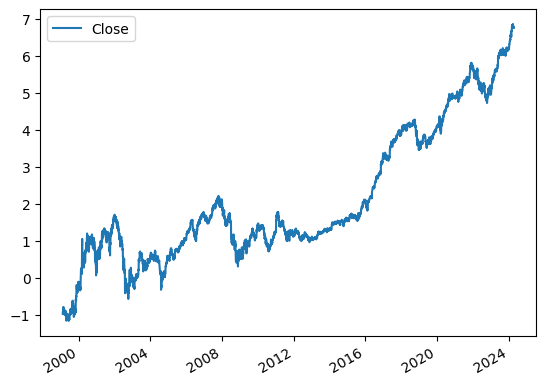

In [84]:
df_nvda_log.plot()

<Axes: >

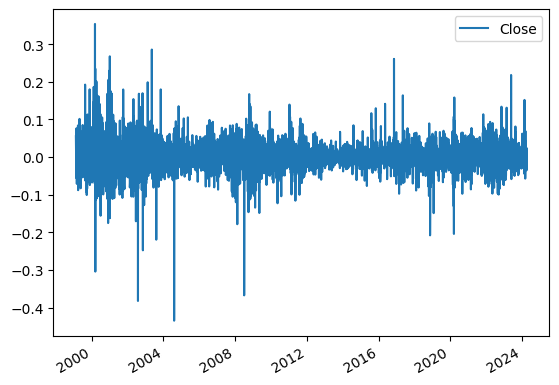

In [85]:
df_nvda_log_diff.plot()

<Axes: >

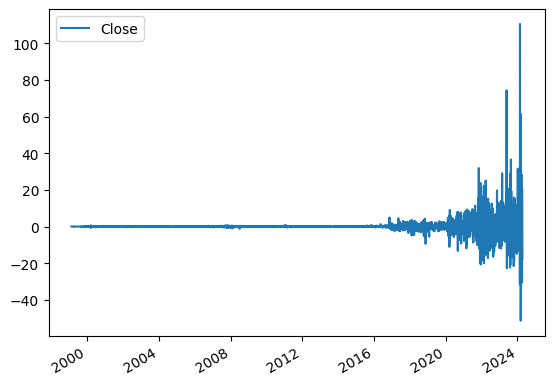

In [86]:
df_diff.plot()

In [89]:
nan_count = df_nvda_log_diff.isna().sum().sum()
inf_count = np.isinf(df_nvda_log_diff).sum().sum()

print("Number of NaN values in the DataFrame:", nan_count)
print("Number of infinite values in the DataFrame:", inf_count)

df_diff = df_diff.drop(df_diff.index[0])
nan_count = df_diff.isna().sum().sum()
inf_count = np.isinf(df_diff).sum().sum()

print("Number of NaN values in the DataFrame:", nan_count)
print("Number of infinite values in the DataFrame:", inf_count)

Number of NaN values in the DataFrame: 0
Number of infinite values in the DataFrame: 0
Number of NaN values in the DataFrame: 0
Number of infinite values in the DataFrame: 0


In [90]:
def perform_adf_test(ts):
    adf_result = adfuller(ts)
    return adf_result

adf_result = perform_adf_test(df_nvda_log_diff)
print("ADF test statistics:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical values:", adf_result[4])

ADF test statistics: -15.537773718128586
p-value: 2.178948148274114e-28
Critical values: {'1%': -3.4313875835574374, '5%': -2.861998520624544, '10%': -2.5670140674892035}


In [91]:
def perform_adf_test(ts):
    adf_result = adfuller(ts)
    return adf_result

adf_result = perform_adf_test(df_diff)
print("ADF test statistics:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical values:", adf_result[4])

ADF test statistics: -8.795217183662832
p-value: 2.1857329981394172e-14
Critical values: {'1%': -3.431389397678675, '5%': -2.861999322166334, '10%': -2.567014494168742}


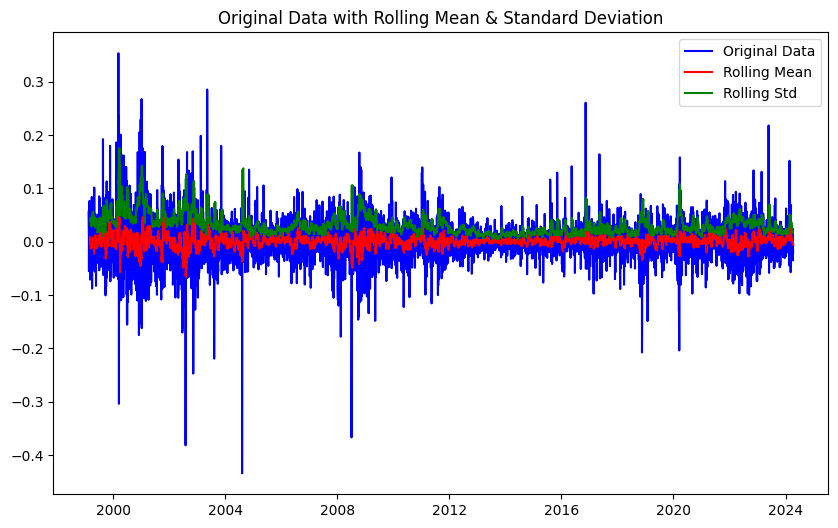

In [19]:
ts = df_nvda_log_diff

plt.figure(figsize=(10, 6))
plt.plot(ts, color='blue', label='Original Data')

rolling_mean = ts.rolling(window=12).mean()
rolling_std = ts.rolling(window=12).std()

plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='green', label='Rolling Std')
plt.title('Original Data with Rolling Mean & Standard Deviation')
plt.legend()
plt.show()


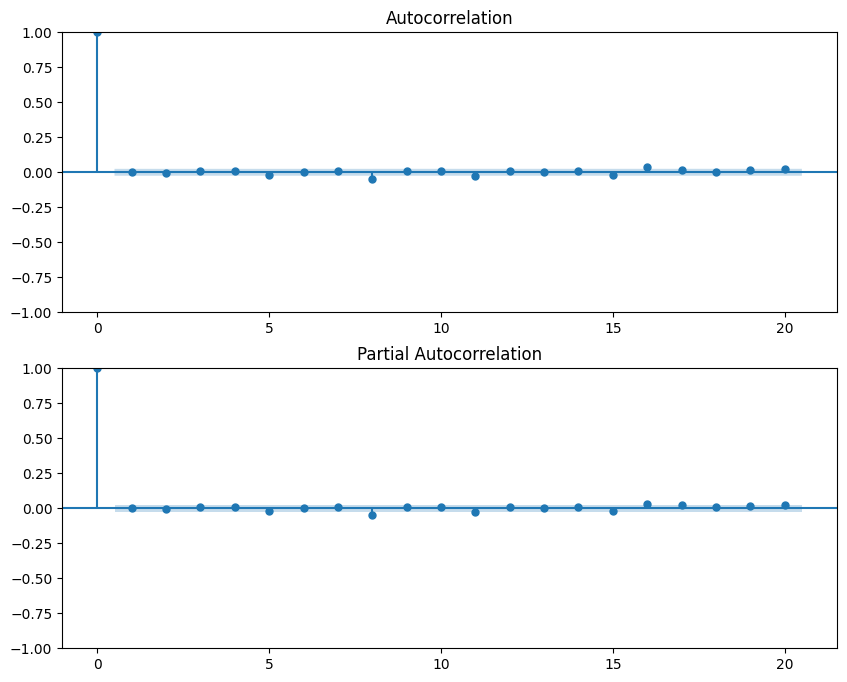

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(ts, ax=axes[0], lags=20)
plot_pacf(ts, ax=axes[1], lags=20)
plt.show()

After inspection we can conclude that the data is now stationary using 1 difference. We can set the paramater d at 1.

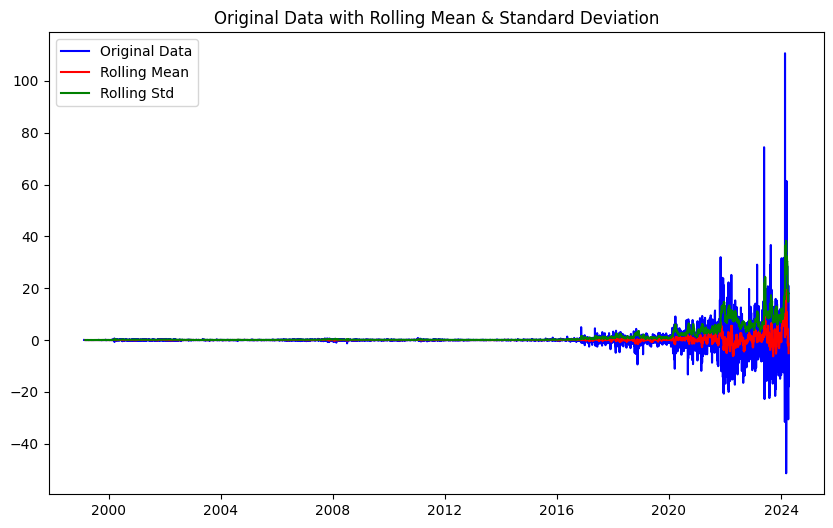

In [21]:
ts = df_diff

plt.figure(figsize=(10, 6))
plt.plot(ts, color='blue', label='Original Data')

rolling_mean = ts.rolling(window=12).mean()
rolling_std = ts.rolling(window=12).std()

plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='green', label='Rolling Std')
plt.title('Original Data with Rolling Mean & Standard Deviation')
plt.legend()
plt.show()


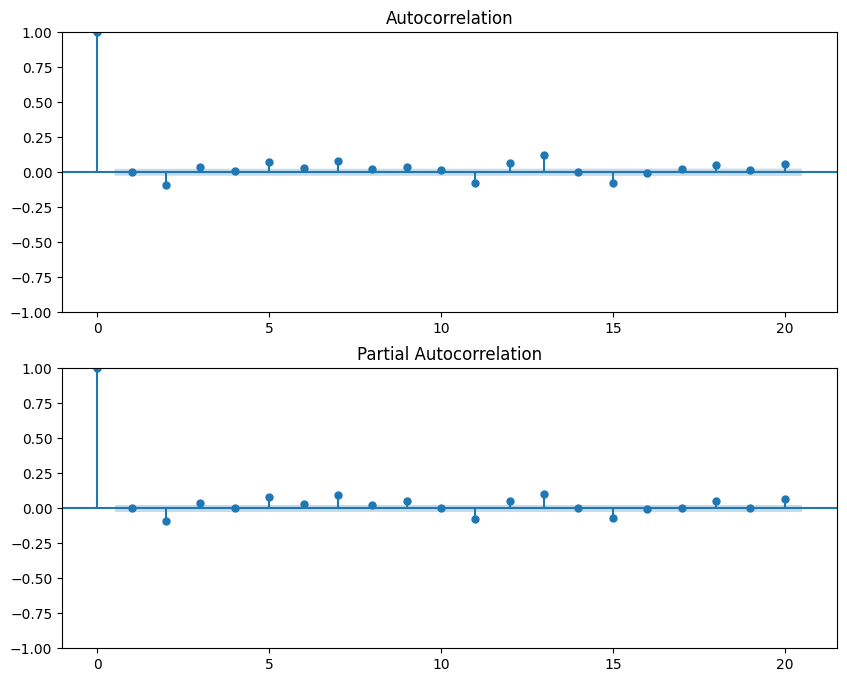

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(ts, ax=axes[0], lags=20)
plot_pacf(ts, ax=axes[1], lags=20)
plt.show()

# Looking for best p d an q values

## First df_nvda_log_diff

In [39]:
ts = df_nvda_log_diff['Close']

train_size = int(len(ts) * 0.8)
train_data, test_data = ts[:train_size], ts[train_size:]

train_df = pd.DataFrame({'Date': train_data.index, 'Close': train_data.values})
test_df = pd.DataFrame({'Date': test_data.index, 'Close': test_data.values})

In [24]:
p_values = range(0, 4)  
d_values = range(0, 4) 
q_values = range(0, 4) 
parameter_combinations = list(itertools.product(p_values, d_values, q_values))

warnings.filterwarnings("ignore")

best_aic = float("inf")
best_params = None

for params in parameter_combinations:
    try:
        model = ARIMA(train_data, order=params)
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_params = params
    except:
        continue

print("Best ARIMA parameters:", best_params)
print("Best AIC:", best_aic)


Best ARIMA parameters: (2, 0, 3)
Best AIC: -18519.58477900866


In [41]:
train_data = train_df['Close']
model = ARIMA(train_data, order=(2, 0, 3))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5063
Model:                 ARIMA(2, 0, 3)   Log Likelihood                9266.792
Date:                Fri, 12 Apr 2024   AIC                         -18519.585
Time:                        10:03:02   BIC                         -18473.877
Sample:                             0   HQIC                        -18503.575
                               - 5063                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      1.428      0.153      -0.000       0.002
ar.L1         -0.5353      0.021    -25.482      0.000      -0.576      -0.494
ar.L2         -0.9361      0.021    -45.115      0.0

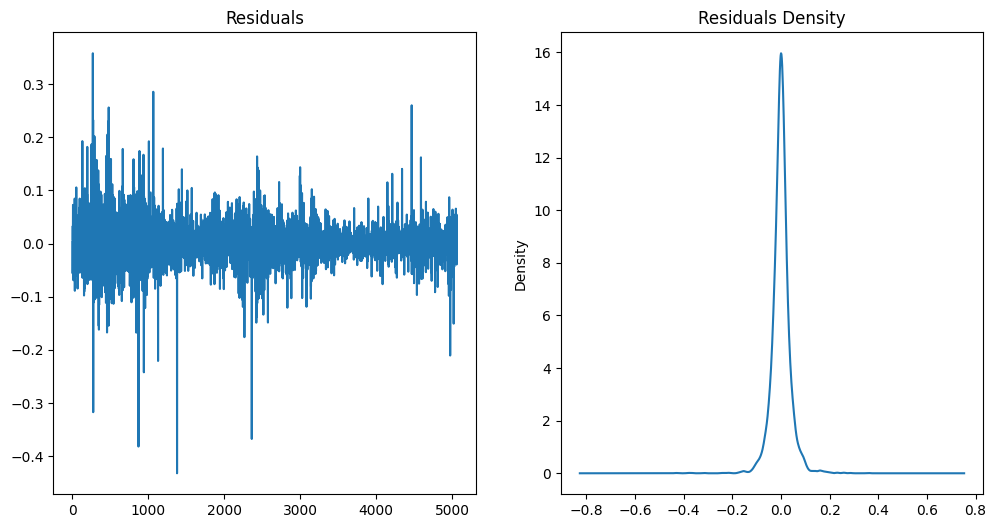

In [42]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Residuals Density', kind='kde', ax=ax[1])
plt.show()

## df_diff so only difference no log transformation

In [92]:
ts = df_diff['Close']

train_size = int(len(ts) * 0.8)
train_data, test_data = ts[:train_size], ts[train_size:]

train_df = pd.DataFrame({'Date': train_data.index, 'Close': train_data.values})
test_df = pd.DataFrame({'Date': test_data.index, 'Close': test_data.values})

In [45]:
p_values = range(0, 4)  
d_values = range(0, 4) 
q_values = range(0, 4) 
parameter_combinations = list(itertools.product(p_values, d_values, q_values))

warnings.filterwarnings("ignore")

best_aic = float("inf")
best_params = None

for params in parameter_combinations:
    try:
        model = ARIMA(train_data, order=params)
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_params = params
    except:
        continue

print("Best ARIMA parameters:", best_params)
print("Best AIC:", best_aic)


Best ARIMA parameters: (2, 0, 2)
Best AIC: 6525.977310918319


In [93]:
train_data = train_df['Close']
model = ARIMA(train_data, order=(2, 0, 2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5063
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -3256.839
Date:                Fri, 12 Apr 2024   AIC                           6525.677
Time:                        10:35:15   BIC                           6564.856
Sample:                             0   HQIC                          6539.400
                               - 5063                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0087      0.007      1.296      0.195      -0.004       0.022
ar.L1         -0.5867      0.007    -83.575      0.000      -0.600      -0.573
ar.L2         -0.9204      0.007   -135.390      0.0

# Training the model


In [124]:
df_close.index = pd.to_datetime(df_close.index)
model = auto_arima(df_close, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.90 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=39220.145, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=37762.770, Time=0.24 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=39218.147, Time=0.09 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=36690.213, Time=0.56 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=36256.644, Time=0.78 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=35772.657, Time=0.95 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=35580.066, Time=1.55 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=8.28 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=34751.108, Time=4.30 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=34752.488, Time=3.84 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=34733.439, Time=8.53 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=34736.314, Time=8.28 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   :

In [126]:
print(model.summary())

forecast_steps = 5
forecast = model.predict(n_periods=forecast_steps)
print("Forecasted values:")
print(forecast)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6331
Model:               SARIMAX(5, 2, 4)   Log Likelihood              -17346.188
Date:                Fri, 12 Apr 2024   AIC                          34714.377
Time:                        11:22:36   BIC                          34788.659
Sample:                             0   HQIC                         34740.103
                               - 6331                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0005      0.001      0.618      0.536      -0.001       0.002
ar.L1         -0.8077      0.059    -13.727      0.000      -0.923      -0.692
ar.L2         -0.1092      0.085     -1.278      0.2

## Forecasted value arima (5, 2, 4) on 12/04/24

Forecasted values:
- 6331    860.593731
- 6332    863.116030
- 6333    865.374906
- 6334    868.618405
- 6335    868.594543

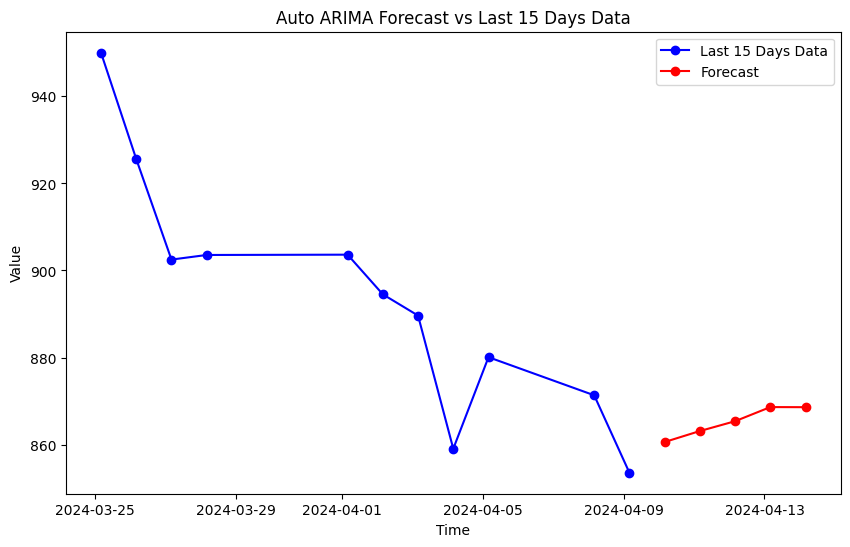

In [140]:
last_15_days_data = df_close[df_close.index >= df_close.index[-1] - pd.Timedelta(days=15)]

forecast_start_date = last_15_days_data.index[-1] + pd.Timedelta(days=1)
forecast_end_date = last_15_days_data.index[-1] + pd.Timedelta(days=len(forecast))
forecast_index = pd.date_range(start=forecast_start_date, periods=len(forecast), freq='D')

plt.figure(figsize=(10, 6))
plt.plot(last_15_days_data.index, last_15_days_data, 'o-', label='Last 15 Days Data', color='blue')
plt.plot(forecast_index, forecast, 'o-', label='Forecast', color='red')
plt.title('Auto ARIMA Forecast vs Last 15 Days Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [151]:
s = 12
model_sarima_12 = auto_arima(df_close, seasonal=True, m=s, max_order=None)

In [153]:
model_sarima_12

ARIMA(order=(5, 2, 2), scoring_args={}, seasonal_order=(2, 0, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [162]:
order = (5, 2, 2)
seasonal_order = (2, 0, 2, 12)
model_sarimax_12 = SARIMAX(df_close, order=order, seasonal_order=seasonal_order)
model_fit_sarima_12 = model_sarimax_12.fit()

forecast_sarima_12 = model_fit_sarima_12.forecast(steps=5)

print("Forecasted values:", forecast_sarima_12)

Forecasted values: 6331    860.884792
6332    863.338470
6333    866.986556
6334    860.688965
6335    862.393211
Name: predicted_mean, dtype: float64


## Forecasted values Sarima (5, 2, 2)[12] on 12/04/24

Forecasted values: 
- 6331    860.884792
- 6332    863.338470
- 6333    866.986556
- 6334    860.688965
- 6335    862.393211


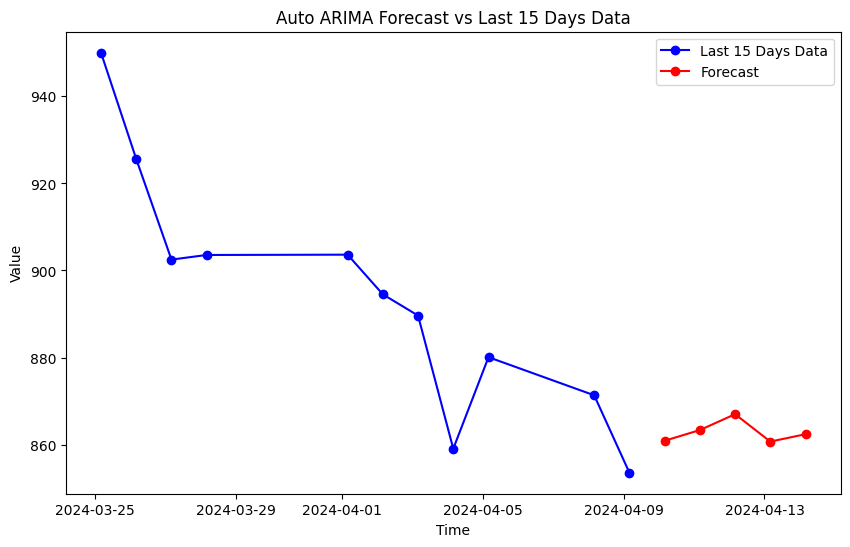

In [159]:
last_15_days_data = df_close[df_close.index >= df_close.index[-1] - pd.Timedelta(days=15)]

forecast_start_date = last_15_days_data.index[-1] + pd.Timedelta(days=1)
forecast_end_date = last_15_days_data.index[-1] + pd.Timedelta(days=len(forecast_sarima_12))
forecast_index = pd.date_range(start=forecast_start_date, periods=len(forecast_sarima_12), freq='D')

plt.figure(figsize=(10, 6))
plt.plot(last_15_days_data.index, last_15_days_data, 'o-', label='Last 15 Days Data', color='blue')
plt.plot(forecast_index, forecast_sarima_12, 'o-', label='Forecast', color='red')
plt.title('Auto ARIMA Forecast vs Last 15 Days Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [160]:
s = 4
model_sarima_4 = auto_arima(df_close, seasonal=True, m=s, max_order=None)

In [161]:
model_sarima_4

ARIMA(order=(2, 2, 1), scoring_args={}, seasonal_order=(2, 0, 2, 4),
      suppress_warnings=True, with_intercept=False)

In [163]:
order = (2, 2, 1)
seasonal_order = (2, 0, 2, 4)
model_sarimax_4 = SARIMAX(df_close, order=order, seasonal_order=seasonal_order)
model_fit_sarima_4 = model_sarimax_4.fit()

forecast_sarima_4 = model_fit_sarima_4.forecast(steps=5)

print("Forecasted values:", forecast)

Forecasted values: 6331    860.884792
6332    863.338470
6333    866.986556
6334    860.688965
6335    862.393211
Name: predicted_mean, dtype: float64


## Forecasted values Sarima (5, 2, 2)[4] on 12/04/24

Forecasted values: 
- 6331    860.884792
- 6332    863.338470
- 6333    866.986556
- 6334    860.688965
- 6335    862.393211

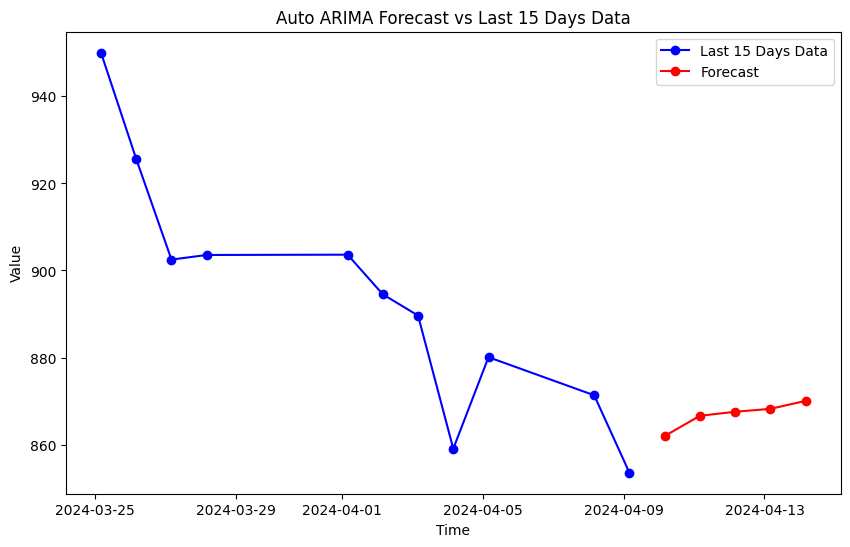

In [164]:
last_15_days_data = df_close[df_close.index >= df_close.index[-1] - pd.Timedelta(days=15)]

forecast_start_date = last_15_days_data.index[-1] + pd.Timedelta(days=1)
forecast_end_date = last_15_days_data.index[-1] + pd.Timedelta(days=len(forecast_sarima_4))
forecast_index = pd.date_range(start=forecast_start_date, periods=len(forecast_sarima_4), freq='D')

plt.figure(figsize=(10, 6))
plt.plot(last_15_days_data.index, last_15_days_data, 'o-', label='Last 15 Days Data', color='blue')
plt.plot(forecast_index, forecast_sarima_4, 'o-', label='Forecast', color='red')
plt.title('Auto ARIMA Forecast vs Last 15 Days Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()